<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.

__Parte 2 (Introdução):__

Para cada variável explicativa $X_1, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$

__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.

<br>

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
    
__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
from sklearn.datasets import make_friedman1, make_classification
import warnings
warnings.filterwarnings('ignore')


In [2]:
#função para acessar os dados do exercício 1

def getData():
    X, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return X, y

In [3]:
#classe regLinear para exercício

class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

In [4]:
#função para acessar os dados do exercício 2

def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.


In [5]:
# carregando os dados

X, y = getData()

In [6]:
X.shape, y.shape

((10000, 5), (10000,))

A função make_friedman1 cria dados aleatórios entre 0 e 1, assim para podemos separar nossos dados de treino e teste de maneira manual, vamos ter 7500 linhas para treino e 2500 para teste.

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
Xtreino, Xteste, ytreino, yteste = X[:7500], X[7500:], y[:7500], y[7500:]

In [9]:
Xtreino.shape, Xteste.shape, ytreino.shape, yteste.shape

((7500, 5), (2500, 5), (7500,), (2500,))

__Validação Cruzada__

Vamos fazer a validação cruzada manual, porém como usaremos o modelo de regressão linear criada do zero, não sabemos qual a melhor quantidade de passes e melhor learning rate, para isso, adicionaremos dois loop for a mais para fazer a variação do learning rate entre 0 e 0.10 e o número de passos entre 0 e 200.

Para isso modifiquei a classe de regressão linear manual para não imprimir a parte "modelo treinado" depois do fit, assim não ficaremos com esse print repetindo depois de cada passo.

Além disso, escolhi como criterio para seleção, o learning rate e numero de passos que nos retornar o maior MSE nos dados de validação.

In [10]:
# separando o conjuto para a validação cruzada manual

Kf = KFold(n_splits = 5)

In [11]:
# criando uma lista com vinte valores iguais pro learning rate

def listaLR(rate):
    A = []
    for i in range(1,22):
        A.append(rate)
    return A



In [12]:
# o primeiro loop for fixa o learning rate, e o segundo faz a variação com ele e os passos entre 0 e 200
# depois dos loops, as médias são acrescentadas nas duas listas criadas no começo do código e impriminos por fim a menor
# das médias tanto nos dados de validação, com seus respectivos learning rate e numéro de passos


valores_finais = [50000]

for n in np.arange(0.05,0.11,0.0025):
    B = listaLR(n)

    for lr, stp in list(zip(B,np.arange(0,201,10))):
    
        RegManual = regLinear(learning_rate = lr, num_steps = stp)
    
        lista_MSE_treino = []
        lista_MSE_validacao = []

        for treino_index, val_index in Kf.split(Xtreino, ytreino):
    
            Xtreino_folds = Xtreino[treino_index]
            ytreino_folds = ytreino[treino_index]
            Xval_fold = Xtreino[val_index]
            yval_fold = ytreino[val_index]
    
            RegManual.fit(Xtreino_folds, ytreino_folds)
    
            predicao_treino = RegManual.predict(Xtreino_folds)
            predicao_validacao = RegManual.predict(Xval_fold)
    
            lista_MSE_treino.append(mean_squared_error(y_true = ytreino_folds, y_pred = predicao_treino))
            lista_MSE_validacao.append(mean_squared_error(y_true = yval_fold, y_pred = predicao_validacao))
            
            a = round(np.mean(lista_MSE_treino),4)
            b = round(np.mean(lista_MSE_validacao),4)
            if (b < valores_finais[0]):
                valores_finais = [a, b, lr, stp]
            else:
                continue
                
        
print('A menores média para dados de treino e validação foram: \n\nMédia de treino: ', valores_finais[0],
      '\n\nMédia de validação:', valores_finais[1], '\n\nLearning Rate: ', valores_finais[2], '\nSteps: ', valores_finais[3])

A menores média para dados de treino e validação foram: 

Média de treino:  31.014 

Média de validação: 30.9464 

Learning Rate:  0.10750000000000005 
Steps:  200


----------------------------------------------------------------------------------------------------------------------------
Cabe a observação que poderiamos ter feito uma variação maior tanto na quantidade de passo, quanto no learning rate, porém para fins de entendimento, a variação escolhida é suficiente.

Vamos criar o nosso modelo então com os melhores dados obtidos.

__Melhor learning rate:__ 0.1075

__Melhor número de passos:__ 200

In [13]:
# criando o modelo

RGfinal = regLinear(learning_rate = 0.1075, num_steps = 200)

In [14]:
# fitando nos dados de treino

RGfinal.fit(Xtreino, ytreino)

In [15]:
# além do MSE, vamos calcular também o R2 score para possíveis comparações futuras

pred_final = RGfinal.predict(Xteste)
MSE = mean_squared_error(y_true = yteste, y_pred = pred_final)
R2 = r2_score(y_true = yteste, y_pred = pred_final)
print('MSE nos dados de teste: ', round(MSE,5))
print('R2 Score: ', round(R2,5))

MSE nos dados de teste:  30.59051
R2 Score:  0.34607


__Graficamente__:

Vamos então plotar um gráfico para visualizar melhor os resultados obtidos com seus respectivos erros.

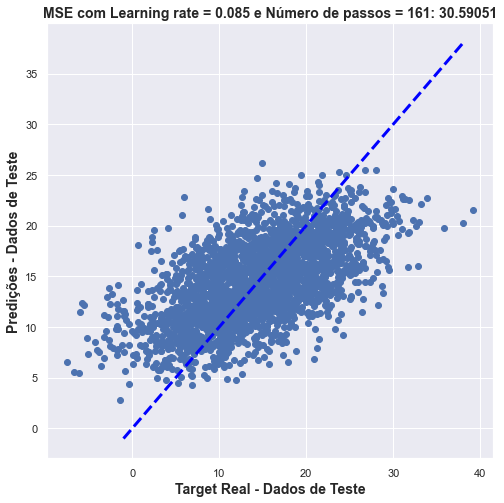

In [16]:
plt.figure(figsize=[8,8])
plt.title("MSE com Learning rate = 0.085 e Número de passos = 161: " + str(round(MSE,5)), fontweight = 'bold', fontsize = 14)
plt.scatter(yteste, pred_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
range_line = int(np.maximum(max(yteste), max(pred_final)))
plt.plot(range(-1, range_line), range(-1, range_line), '--' ,c = 'blue', lw = 3)
plt.show()

Usamos apenas o MSE como parâmetro, e parece que temos uma boa aproximação entre as predições e dados reais, vemos também com o gráfico acima que temos alguns erros, porem de maneira geral, estamos com um bom resultado.

Agora vamos usar a Regressão Linear do Sci Kit Learn assim como a validação cruzada (só com cuidado pois a validação cruzada do sklearn traz o MSE com valor negativo).

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [18]:
lm = LinearRegression()
lm.fit(Xtreino, ytreino)

LinearRegression()

In [19]:
validacao_cruzada = cross_val_score(estimator = lm, 
                             X = Xtreino, 
                             y = ytreino, 
                             cv = 5, 
                             scoring = 'neg_mean_squared_error')
print(validacao_cruzada)
print('media: ', round(validacao_cruzada.mean(),5))

[-31.47494413 -28.81555089 -30.90586364 -32.09590469 -31.52100438]
media:  -30.96265


In [20]:
mean_squared_error(y_true = yteste, y_pred = lm.predict(Xteste))

30.606024758044967

Comparando as duas validações estão com valores bem próximos:

__MSE da regressão linear manual:__ 30.59051

__MSE da regressão linear do sklearn:__ 30.60602

Vamos agora comparar os coeficientes.

In [21]:
RGfinal.theta_final

array([[ 1.01117411],
       [ 5.82038857],
       [ 6.80824137],
       [-0.0641073 ],
       [10.05695567],
       [ 4.22495983]])

In [22]:
# algums predições para compararmos também.

RGfinal.predict(Xteste)

array([23.8018028 , 16.84264319, 16.60394455, ..., 15.48761111,
       17.79266081, 19.58212505])

In [23]:
lm.intercept_, lm.coef_

(-0.1750220157724076,
 array([ 6.34642766,  7.32237956,  0.22274329, 10.58969836,  4.66476975]))

In [24]:
lm.predict(Xteste)

array([24.56904437, 16.81987367, 16.61287764, ..., 15.34497191,
       18.08824855, 19.79195007])

In [25]:
mean_squared_error(y_true = yteste, y_pred = lm.predict(Xteste))

30.606024758044967

In [26]:
mean_squared_error(y_true = yteste, y_pred = RGfinal.predict(Xteste))

30.590511734643975

Não conseguimos encontrar o Theta e número de passos exatos para conseguir a igualdade das duas regressões, porém chegamos bem próximos do resultado do Sci Kit Learn.

__Finalizamos então a Parte 1 do exercício de regressão linear, vamos então para a parte 2__

__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.


In [27]:
from sklearn.preprocessing import PolynomialFeatures

__Modelo Polonomial e validação cruzada__

Assim como na primeiria parte vamos repetir o comando para a validação cruzada, e incremetaremos os modelos polinomiais no mesmo comando, adicionando mais um loop for para fazer a variação dos graus que escolheremos.

Como nosso vetor X possui 5 variáveis, vamos escolher três graus para os modelos, que já será suficiente para entendimento, no caso, escolheremos polinômios de grau 2, 3 e 5. 

In [28]:
import time

In [29]:
t0 = time.time()

lista_treino = [] # listas para salvarem o X transformado depois de cada uma das transformações para caso precisar, 
lista_teste = []  # não ser necessário fitar os modelos de novo. 

for grau in [2,3,5]:
    
    poly_feat = PolynomialFeatures(degree = grau, include_bias = False)
    poly_feat.fit(Xtreino, ytreino)
    X_poly_treino = poly_feat.transform(Xtreino)
    X_poly_teste = poly_feat.transform(Xteste)
    lista_treino.append(X_poly_treino)
    lista_teste.append(X_poly_teste)
    
    valores_finais = [50000]

    for n in np.arange(0.05,0.11,0.0025):
        B = listaLR(n)

        for lr, stp in list(zip(B,np.arange(0,201,10))):
    
            RegManual = regLinear(learning_rate = lr, num_steps = stp)
    
            lista_MSE_treino = []
            lista_MSE_validacao = []

            for treino_index, val_index in Kf.split(X_poly_treino, ytreino):
    
                Xtreino_folds = X_poly_treino[treino_index]
                ytreino_folds = ytreino[treino_index]
                Xval_fold = X_poly_treino[val_index]
                yval_fold = ytreino[val_index]
    
                RegManual.fit(Xtreino_folds, ytreino_folds)
    
                predicao_treino = RegManual.predict(Xtreino_folds)
                predicao_validacao = RegManual.predict(Xval_fold)
    
                lista_MSE_treino.append(mean_squared_error(y_true = ytreino_folds, y_pred = predicao_treino))
                lista_MSE_validacao.append(mean_squared_error(y_true = yval_fold, y_pred = predicao_validacao))
            
                a = round(np.mean(lista_MSE_treino),6)
                b = round(np.mean(lista_MSE_validacao),6)
                if (b < valores_finais[0]):
                    valores_finais = [a, b, lr, stp]
                else:
                    continue
                
        
    print('\nGrau = ', grau, '\nA menores média para dados de treino e validação foram: \n\nMédia de treino: ', valores_finais[0],
          '\n\nMédia de validação:', valores_finais[1], '\n\nLearning Rate: ', valores_finais[2], '\nSteps: ', valores_finais[3])

t1 = time.time()

print('\nTempo de execução: ', (t1-t0)/60, 'minutos')


Grau =  2 
A menores média para dados de treino e validação foram: 

Média de treino:  30.415627 

Média de validação: 30.302025 

Learning Rate:  0.10750000000000005 
Steps:  200

Grau =  3 
A menores média para dados de treino e validação foram: 

Média de treino:  29.266026 

Média de validação: 29.298096 

Learning Rate:  0.10750000000000005 
Steps:  200

Grau =  5 
A menores média para dados de treino e validação foram: 

Média de treino:  27.201859 

Média de validação: 26.813186 

Learning Rate:  0.10750000000000005 
Steps:  200

Tempo de execução:  11.409820834795633 minutos


----------------------------------------------------------------------------------------------------------------------------

Conseguimos diminur o MSE, porém podemos fazer uma observação: Para os 3 graus escolhidos, tanto o learning rate, quanto o número de passos forám até o máximo, provavelmente com uma variação maior dos dois, conseguiriamos diminuir ainda mais o MSE.

__Vamos então testar nos dados de teste.__

In [30]:
# como a última interação no loop for acima foi feita no polinômio de grau 5, não precisamos recuperar o valor de X_poly_treino
# pois esse já é o Xtreino transformado pelo polinômio de grau 5

RGfinal1 = regLinear(learning_rate = 0.1075, num_steps = 200)
RGfinal1.fit(X_poly_treino, ytreino)

In [31]:
pred_final1 = RGfinal1.predict(X_poly_teste)
MSE1 = mean_squared_error(y_true = yteste, y_pred = pred_final1)
R21 = r2_score(y_true = yteste, y_pred = pred_final1)
print('MSE nos dados de teste: ', round(MSE1,5))
print('R2 Score: ', round(R21,5))

MSE nos dados de teste:  26.66826
R2 Score:  0.42992


__Graficamente:__

Vamos plotar o gráfico da análise feita agora com o gráfico feito na Parte 1 do exerício.

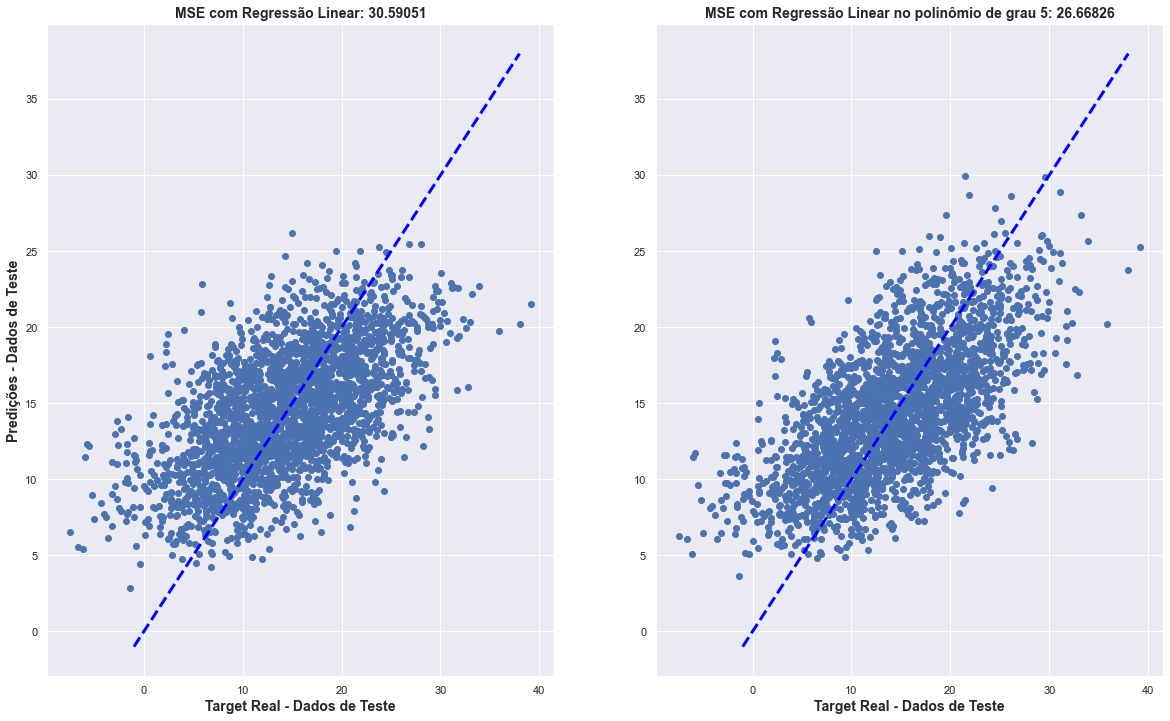

In [32]:
plt.figure(figsize=[20,12])

plt.subplot(1,2,1)
plt.title("MSE com Regressão Linear: " + str(round(MSE,5)), fontweight = 'bold', fontsize = 14)
plt.scatter(yteste, pred_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
range_line = int(np.maximum(max(yteste), max(pred_final)))
plt.plot(range(-1, range_line), range(-1, range_line), '--' ,c = 'blue', lw = 3)


plt.subplot(1,2,2)
plt.title("MSE com Regressão Linear no polinômio de grau 5: " + str(round(MSE1,5)), fontweight = 'bold', fontsize = 14)
plt.scatter(yteste, pred_final1)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
range_line = int(np.maximum(max(yteste), max(pred_final1)))
plt.plot(range(-1, range_line), range(-1, range_line), '--' ,c = 'blue', lw = 3)
plt.show()

#### Interessante que gráficamente conseguimos ver uma boa melhora dos dados em comparação ao primeiro.

In [33]:
# testando a regressão linear do sklearn

lm.fit(X_poly_treino, ytreino)

LinearRegression()

In [34]:
# validação cruzada

validacao_cruzada_mse = cross_val_score(estimator = lm, 
                             X = X_poly_treino, 
                             y = ytreino, 
                             cv = 5, 
                             scoring = 'neg_mean_squared_error')
print(validacao_cruzada)
print('media: ', round(validacao_cruzada_mse.mean(),5))

[-31.47494413 -28.81555089 -30.90586364 -32.09590469 -31.52100438]
media:  -26.13558


In [35]:
validacao_cruzada_r2 = cross_val_score(estimator = lm, 
                             X = X_poly_treino, 
                             y = ytreino, 
                             cv = 5, 
                             scoring = 'r2')
print(validacao_cruzada_r2)
print('media: ', round(validacao_cruzada_r2.mean(),5))

[0.46796596 0.50647385 0.4865875  0.46495826 0.45667349]
media:  0.47653


In [36]:
pred_final2 = lm.predict(X_poly_teste)
MSE2 = mean_squared_error(y_true = yteste, y_pred = pred_final2)
R22 = r2_score(y_true = yteste, y_pred = pred_final2)
print('MSE nos dados de teste: ', round(MSE2,5))
print('R2 Score: ', round(R22,5))

MSE nos dados de teste:  25.48988
R2 Score:  0.45511


Conseguimos um MSE ainda menor, como dito mais acima, provavelmente precisariamos de uma variação maior no learning rate e número de passos na nossa regressão para que ela ficasse mais próxima da regressão do sklearn.

__Comparando gráficamente:__

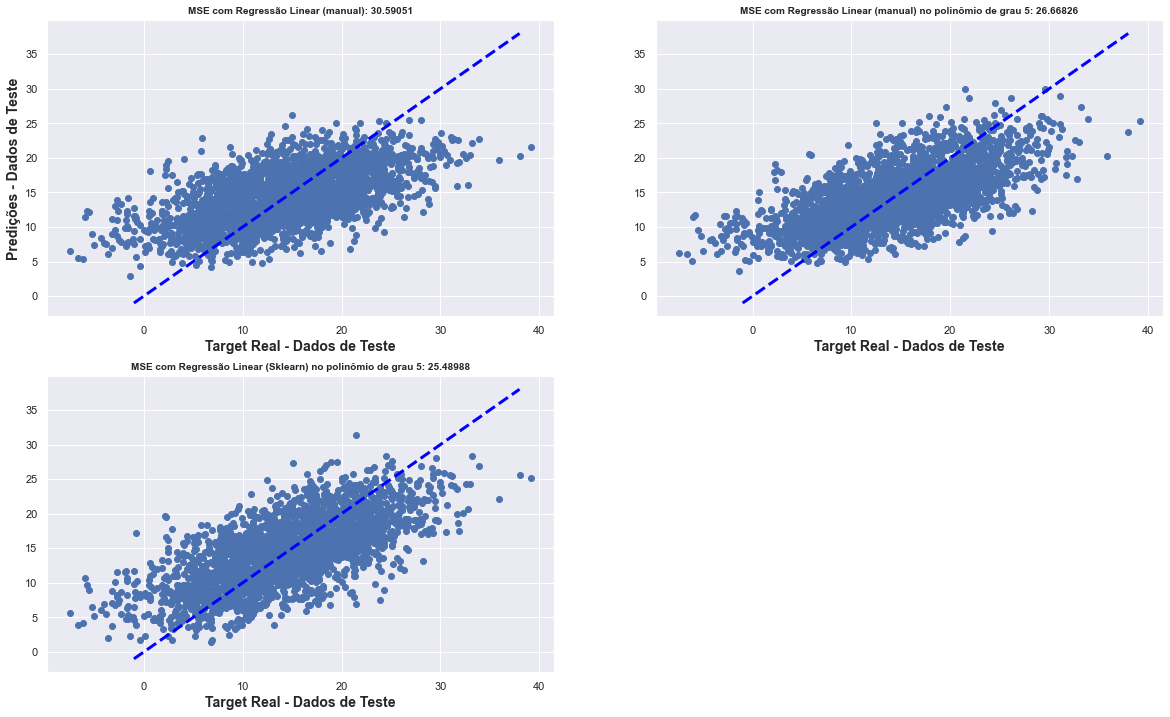

In [37]:
plt.figure(figsize=[20,12])

plt.subplot(2,2,1)
plt.title("MSE com Regressão Linear (manual): " + str(round(MSE,5)), fontweight = 'bold', fontsize = 10)
plt.scatter(yteste, pred_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
range_line = int(np.maximum(max(yteste), max(pred_final)))
plt.plot(range(-1, range_line), range(-1, range_line), '--' ,c = 'blue', lw = 3)


plt.subplot(2,2,2)
plt.title("MSE com Regressão Linear (manual) no polinômio de grau 5: " + str(round(MSE1,5)), fontweight = 'bold', fontsize = 10)
plt.scatter(yteste, pred_final1)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
range_line = int(np.maximum(max(yteste), max(pred_final1)))
plt.plot(range(-1, range_line), range(-1, range_line), '--' ,c = 'blue', lw = 3)

plt.subplot(2,2,3)
plt.title("MSE com Regressão Linear (Sklearn) no polinômio de grau 5: " + str(round(MSE2,5)), fontweight = 'bold', fontsize = 10)
plt.scatter(yteste, pred_final2)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
range_line = int(np.maximum(max(yteste), max(pred_final2)))
plt.plot(range(-1, range_line), range(-1, range_line), '--' ,c = 'blue', lw = 3)
plt.show()

### Graficamente também conseguimos ver o melhor resultado da regressão do SciKit Learn.

Vamos comparar os dez primeiros coeficientes.

In [38]:
RGfinal1.theta_final[:10]

array([[ 3.43470356],
       [ 4.67113053],
       [ 4.48072855],
       [-2.21531277],
       [ 4.7513965 ],
       [ 2.5888834 ],
       [-0.68275428],
       [ 3.06718298],
       [-0.39657793],
       [ 1.40562367]])

In [39]:
lm.intercept_, lm.coef_[:10]

(1.6050717417227425,
 array([  3.66674552,  52.61252781, -44.73463025,  23.00383652,
         26.03065979, -37.82960644, -64.93296851, 110.94138457,
        -53.05877978,  20.05406047]))

In [40]:
lm.predict(X_poly_teste)[:10]

array([25.08559367, 15.47950099, 14.29500084, 10.38925493, 23.75893541,
        6.37444999, 18.29906017,  8.7551253 , 17.80996265, 13.58251267])

In [41]:
RGfinal1.predict(X_poly_teste)[:10]

array([28.61794697, 16.21798385, 15.48148419, 11.78370927, 23.55737183,
        6.08634662, 16.47879491,  9.67970111, 19.85096161, 12.55523676])

Apesar dos coeficiente estarem bem diferentes, as predições dos primeiros termos estão bem próximas.

__Regularização:__

Vamos fazer as regularizações Ridge e Lasso com o auxilio da função vista em aula.

In [42]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [43]:
def polyFitReg(X, y,grau, base_model, base_model_name):
    
    polybig_features = PolynomialFeatures(degree = grau, include_bias = False)
    std_scaler = StandardScaler()
    basemodel = base_model
    

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            (base_model_name, base_model),
        ])
    
    polynomial_regression.fit(X, y)
    return polynomial_regression

In [44]:
grau = 5

for alpha in [0, 0.001, 0.01, 0.1, 1]:
    
    model_name = 'Ridge_ alpha: '+str(alpha)
    polyfit = polyFitReg(Xtreino, 
                         ytreino,
                         grau,
                         base_model = Ridge(alpha = alpha), 
                         base_model_name = model_name)
    
    ypoly_novo = polyfit.predict(Xteste)
    MSE3 = mean_squared_error(y_true = yteste, y_pred = polyfit.predict(Xteste))
    print(model_name)
    print("MSE:")
    print('treino:',  mean_squared_error(y_true = ytreino, y_pred = polyfit.predict(Xtreino)))
    print('novos dados:', MSE3)
    print("------------------------------------------------\n\n")

Ridge_ alpha: 0
MSE:
treino: 24.21902571660871
novos dados: 25.48987630515977
------------------------------------------------


Ridge_ alpha: 0.001
MSE:
treino: 24.219498547066244
novos dados: 25.474261581111623
------------------------------------------------


Ridge_ alpha: 0.01
MSE:
treino: 24.231688026976364
novos dados: 25.418342039939922
------------------------------------------------


Ridge_ alpha: 0.1
MSE:
treino: 24.298760870648138
novos dados: 25.307134449086085
------------------------------------------------


Ridge_ alpha: 1
MSE:
treino: 24.436635655419238
novos dados: 25.117608366793284
------------------------------------------------




Note que para alpha = 0, temos a regressão linear sem normalização e o MSE é o mesmo obtido anterioreme. 

### E se aumentar o grau para 10? O que acontece?

In [45]:
grau = 10

for alpha in [0, 0.0001, 0.001, 0.01, 0.1, 1]:
    
    model_name = 'Ridge_ alpha: '+str(alpha)
    polyfit = polyFitReg(Xtreino, 
                         ytreino,
                         grau,
                         base_model = Ridge(alpha = alpha), 
                         base_model_name = model_name)
    
    ypoly_novo1 = polyfit.predict(Xteste)
    MSE4 = mean_squared_error(y_true = yteste, y_pred = polyfit.predict(Xteste))
    print(model_name)
    print("MSE:")
    print('Treino:',  mean_squared_error(y_true = ytreino, y_pred = polyfit.predict(Xtreino)))
    print('Teste:', MSE4)
    print("------------------------------------------------\n\n")

Ridge_ alpha: 0
MSE:
Treino: 15.250272387257858
Teste: 98.60735323379873
------------------------------------------------


Ridge_ alpha: 0.0001
MSE:
Treino: 19.440633824315718
Teste: 33.16794851370227
------------------------------------------------


Ridge_ alpha: 0.001
MSE:
Treino: 20.53457843180845
Teste: 29.49011470672757
------------------------------------------------


Ridge_ alpha: 0.01
MSE:
Treino: 21.574889854457606
Teste: 27.974214448809636
------------------------------------------------


Ridge_ alpha: 0.1
MSE:
Treino: 22.427248267007222
Teste: 26.834061938028615
------------------------------------------------


Ridge_ alpha: 1
MSE:
Treino: 23.148948195961683
Teste: 26.029285081078623
------------------------------------------------




Temos um overfiting na Regressão Linear  alpha = 0) e a medida que os graus aumenta, conseguimos um melhor ajuste.

###  Agora faremos a regularização Lasso para grau = 5.

In [46]:
grau = 5

for alpha in [0,0.0001, 0.001, 0.01, 0.1, 1]:
    
    model_name = 'Lasso_ alpha: '+str(alpha)
    polyfit1 = polyFitReg(Xtreino, 
                         ytreino,
                         grau,
                         base_model = Lasso(alpha = alpha), 
                         base_model_name = model_name)
    
    ypoly_novo2 = polyfit1.predict(Xteste)
    MSE5 = mean_squared_error(y_true = yteste, y_pred = polyfit1.predict(Xteste))
    print(model_name)
    print("MSE:")
    print('Treino:',  mean_squared_error(y_true = ytreino, y_pred = polyfit1.predict(Xtreino)))
    print('Teste:', MSE5)
    print("------------------------------------------------\n\n")

Lasso_ alpha: 0
MSE:
Treino: 24.56100949176054
Teste: 25.05209172844679
------------------------------------------------


Lasso_ alpha: 0.0001
MSE:
Treino: 24.561478752294867
Teste: 25.045195110588452
------------------------------------------------


Lasso_ alpha: 0.001
MSE:
Treino: 24.610153670496757
Teste: 24.99457217700519
------------------------------------------------


Lasso_ alpha: 0.01
MSE:
Treino: 24.831521164340565
Teste: 24.955762426594415
------------------------------------------------


Lasso_ alpha: 0.1
MSE:
Treino: 25.598997618783585
Teste: 25.42575526503544
------------------------------------------------


Lasso_ alpha: 1
MSE:
Treino: 34.00206648229961
Teste: 32.80139188291864
------------------------------------------------




Para finalizar o exercício vamos pegar a regularização Ridge com Alpha = 1 e plotar os gráficos comparando com o gráfico sem regularização.

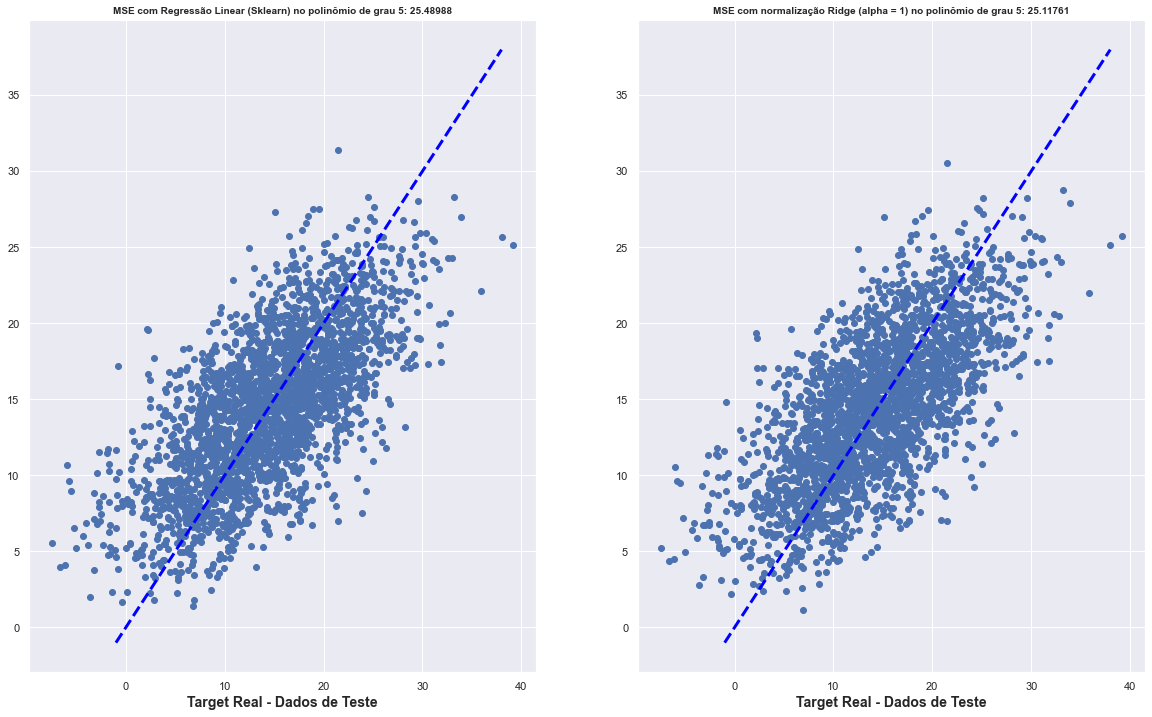

In [47]:
plt.figure(figsize = (20,12))

plt.subplot(1,2,1)
plt.title("MSE com Regressão Linear (Sklearn) no polinômio de grau 5: " + str(round(MSE2,5)), fontweight = 'bold', fontsize = 10)
plt.scatter(yteste, pred_final2)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
range_line = int(np.maximum(max(yteste), max(pred_final2)))
plt.plot(range(-1, range_line), range(-1, range_line), '--' ,c = 'blue', lw = 3)

plt.subplot(1,2,2)
plt.title("MSE com normalização Ridge (alpha = 1) no polinômio de grau 5: " + str(round(MSE3,5)), fontweight = 'bold', fontsize = 10)
plt.scatter(yteste, ypoly_novo)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
range_line = int(np.maximum(max(yteste), max(ypoly_novo)))
plt.plot(range(-1, range_line), range(-1, range_line), '--' ,c = 'blue', lw = 3)
plt.show()

Como não tinhamos overfiting, a regularização não fez uma diferença significativa nos nossos modelos, até gráficamente, é dificil de ver a diferença.

__Finalizamos então o exercício de regressão linear, vamos para o próximo, onde criaremos um modelo de regressão logística do zero e aplicaremos em um exemplo__

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar

__Criando a classe:__

Vamos pegar a classe de regressão já criada como uma base, porém com os métodos para classificação, além disso, teremos que colocar a função sigmoid dentro da classe.

In [48]:
class regLogistica():
    
    def __init__(self, learning_rate, num_steps, limiar):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.limiar = limiar
        
    def fit(self, X, y):
        def sigmoid(t):
            return 1 / (1 + np.exp(-t))
        X_b = np.c_[np.ones(X.shape[0]), X]
        theta = np.random.randn(X_b.shape[1],1)
        for step in range(self.num_steps):
            yscores = sigmoid(X_b.dot(theta))
            gradient = X_b.T.dot(yscores - y)
            theta = theta - self.learning_rate*gradient
        self.theta_final = theta
        
    def predict_proba(self, X):
        def sigmoid(t):
            return 1 / (1 + np.exp(-t))
        X_b = np.c_[np.ones(X.shape[0]), X]
        probs = sigmoid(X_b.dot(self.theta_final))
        return probs
    
    def predict(self, X):
        def sigmoid(t):
            return 1 / (1 + np.exp(-t))
        X_b = np.c_[np.ones(X.shape[0]), X]
        probs = sigmoid(X_b.dot(self.theta_final))
        ypred = np.where(probs > self.limiar, 1, 0)
        return ypred
                        

Pronto, temos a classe criada, vamos para a Parte 2, onde carregaremos um dataset, aplicamos nossa regressão logística e comparamos com os dados obtidos pela regressão logística do SciKit Learn.

__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

In [49]:
# carregando os dados

X, y = getData2()

In [50]:
# separando os dados de treino e teste.

Xtreino, Xteste, ytreino, yteste = X[:7500], X[7500:], y[:7500], y[7500:]

In [51]:
# conferindo o tamanho dos dados

Xtreino.shape, Xteste.shape, ytreino.shape, yteste.shape

((7500, 5), (2500, 5), (7500,), (2500,))

Como nossa variável target (y) está sem nenhuma coluna, precisamos fazer um reshape nela, caso contrário, não conseguiremos aplicar os métodos da regressão logística nele.

In [52]:
ytreino = ytreino.reshape(-1,1)
yteste = yteste.reshape(-1,1)

ytreino.shape, yteste.shape

((7500, 1), (2500, 1))

__Validação Cruzada:__

A ideia da validação cruzada vai ser a mesma feita no exercício de regressão linear, porém nossa classe agora tem um parâmetro a mais, o limiar, portanto acrescetaremos um loop for a mais, assim conseguiremos o melhor limiar, número de passos e learning rate para a classe criada.

Como critério de escolha, usaremos o modelo que trará o maior AUC.

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve

In [54]:
def listaLR(rate):
    A = []
    for i in range(1,22):
        A.append(rate)
    return A

In [55]:
# para evitar possíveis overfiting, vamos variar o limiar apenas entre 0.4 e 0.7

t0 = time.time()

valores_finais = [0]

for lm in np.arange(0.4,0.8 , 0.1):

    for n in np.arange(0.01,0.060,0.0025):
        B = listaLR(n)

        for lr, sp in list(zip(B,np.arange(0,201,10))):

            LogManual = regLogistica(learning_rate = lr, num_steps = sp, limiar = lm)

            lista_auc_treino = []
            lista_auc_validacao = []

            for treino_index, val_index in Kf.split(Xtreino, ytreino):

                Xtreino_folds = Xtreino[treino_index]
                ytreino_folds = ytreino[treino_index]
                Xval_fold = Xtreino[val_index]
                yval_fold = ytreino[val_index]

                LogManual.fit(Xtreino_folds, ytreino_folds)

                predicao_treino = LogManual.predict_proba(Xtreino_folds)
                predicao_validacao = LogManual.predict_proba(Xval_fold)

                lista_auc_treino.append(roc_auc_score(y_true = ytreino_folds, y_score = predicao_treino))
                lista_auc_validacao.append(roc_auc_score(y_true = yval_fold, y_score = predicao_validacao))

                a = round(np.mean(lista_auc_validacao), 4)
                b = round(np.mean(lista_auc_treino), 4)
                
                if a > valores_finais[0]:
                    valores_finais = [a,b, lr, sp, lm]

print('Conseguimos então o melhor resultado com os seguintes parâmentros:')            
print('\nLearning Rate: ', valores_finais[2])
print('\nNúmero de Passos: ', valores_finais[3])
print('\nLimiar: ', valores_finais[4])
print("\nMédia AUC em Treino: ", valores_finais[1])
print("\nMédia AUC em validação: ",valores_finais[0])


t1 = time.time()
print("\ntempo para execução: ", np.round(t1-t0,2), 'segundos')

Conseguimos então o melhor resultado com os seguintes parâmentros:

Learning Rate:  0.01

Número de Passos:  120

Limiar:  0.4

Média AUC em Treino:  0.8948

Média AUC em validação:  0.897

tempo para execução:  123.49 segundos


__Criando o modelo e plotando a curva ROC__

In [56]:
LogFinal = regLogistica(learning_rate = 0.01, num_steps = 120, limiar = 0.4)

In [57]:
LogFinal.fit(Xtreino, ytreino)

In [58]:
roc_auc_score(y_true = yteste, y_score = LogFinal.predict_proba(Xteste))

0.8945113923856203

In [59]:
fpr, tpr, thresholds = roc_curve(y_true = yteste, y_score = LogFinal.predict_proba(Xteste)) 

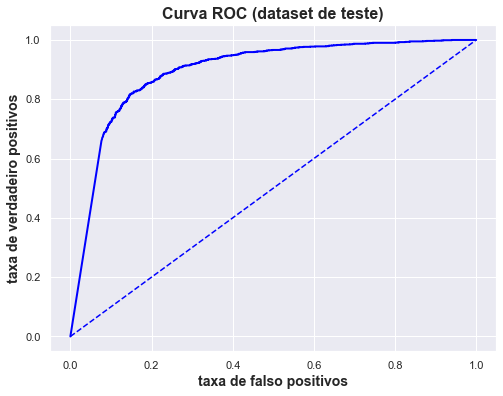

In [60]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--', c = 'blue')
plt.show()

Agora vamos repetir o processo usando a regressão logística do SciKit Learn.

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
Lreg = LogisticRegression()

lista_auc_treino = []
lista_auc_validacao = []

for treino_index, val_index in Kf.split(Xtreino, ytreino):
    
    Xtreino_folds = Xtreino[treino_index]
    ytreino_folds = ytreino[treino_index]
    Xval_fold = Xtreino[val_index]
    yval_fold = ytreino[val_index]
    
    Lreg.fit(Xtreino_folds, ytreino_folds)
    
    predicao_treino = Lreg.predict_proba(Xtreino_folds)[:,1]
    predicao_validacao = Lreg.predict_proba(Xval_fold)[:,1]
    
    lista_auc_treino.append(roc_auc_score(y_true = ytreino_folds, y_score = predicao_treino))
    lista_auc_validacao.append(roc_auc_score(y_true = yval_fold, y_score = predicao_validacao))


print("AUC em Treino: \n", lista_auc_treino, " \n| média: ", np.mean(lista_auc_treino))
print()
print("AUC em validação: \n", lista_auc_validacao, " \n| média: ", np.mean(lista_auc_validacao))


AUC em Treino: 
 [0.897169418842806, 0.8944944402563135, 0.8963591939564513, 0.8972470661450924, 0.8961805950620093]  
| média:  0.8962901428525345

AUC em validação: 
 [0.892652171979903, 0.9025127631141108, 0.8957108473171226, 0.8921744191651833, 0.896697147512233]  
| média:  0.8959494698177105


Conseguimos um AUC bem proximo do módelo aplicado do zero, um bom sinal, vamos calcular nos dados deste e por fim, plotar a curva ROC e fazer a comparação.

In [63]:
Lreg.fit(Xtreino,ytreino)

LogisticRegression()

In [64]:
roc_auc_score(y_true = yteste, y_score = Lreg.predict_proba(Xteste)[:,1])

0.9048436118992045

In [65]:
fpr1, tpr1, thresholds1 = roc_curve(y_true = yteste, y_score = Lreg.predict_proba(Xteste)[:,1]) 

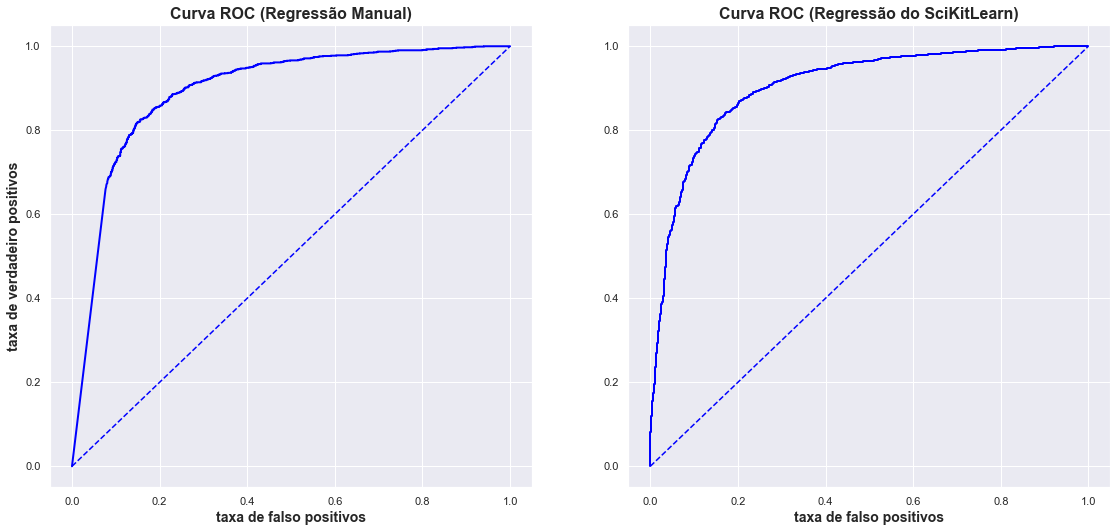

In [66]:
plt.figure(figsize = (19,8.5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (Regressão Manual)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--', c = 'blue')


plt.subplot(1,2,2)
plt.plot(fpr1, tpr1, c = 'blue', lw = 2)
plt.title("Curva ROC (Regressão do SciKitLearn)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--', c = 'blue')

plt.show()

### As duas curvas são praticamente idênticas, além do AUC obtido pelas duas, conseguimos então implementar do zero bons modelos de regressão, tanto linear e polinomial no primeiro exercício, quanto a logística nesse segundo.

__Finalizamos então o exercício do módulo.__